In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
pip install opencv-contrib-python

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
from pathlib import Path
%matplotlib inline

In [ ]:
image_directory = '/content/drive/My Drive/images/'

In [ ]:
model = cv2.CascadeClassifier('/content/drive/My Drive/haarcascade_frontalface_alt.xml')

In [ ]:
# funktion för att detektera ansikten och rita rektanglar.
def detect_and_display(model, image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = model.detectMultiScale(gray_image, 1.1, 4)

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 4)

    return image

In [ ]:
# Hämta alla .jpg-filer i katalogen.
image_paths = list(Path(image_directory).glob('*.jpg'))

In [ ]:
# Loopa igenom alla bildvägar och visa de bearbetade bilderna.
for image_path in image_paths:
    processed_img = detect_and_display(model, str(image_path))
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [2]:
def calculate_performance_metrics(TP, FP, FN):
    # Beräkna Precision
    Precision = TP / (TP + FP)

    # Beräkna Recall
    Recall = TP / (TP + FN)

    # Beräkna F1 Score
    F1_Score = 2 * (Precision * Recall) / (Precision + Recall)

    return Precision, Recall, F1_Score

In [3]:
# Ange värden
TP = 117
FP = 24
FN = 65

In [4]:
Precision, Recall, F1_Score = calculate_performance_metrics(TP, FP, FN)

print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1 Score: {F1_Score:.4f}")

Precision: 0.8298
Recall: 0.6429
F1 Score: 0.7245


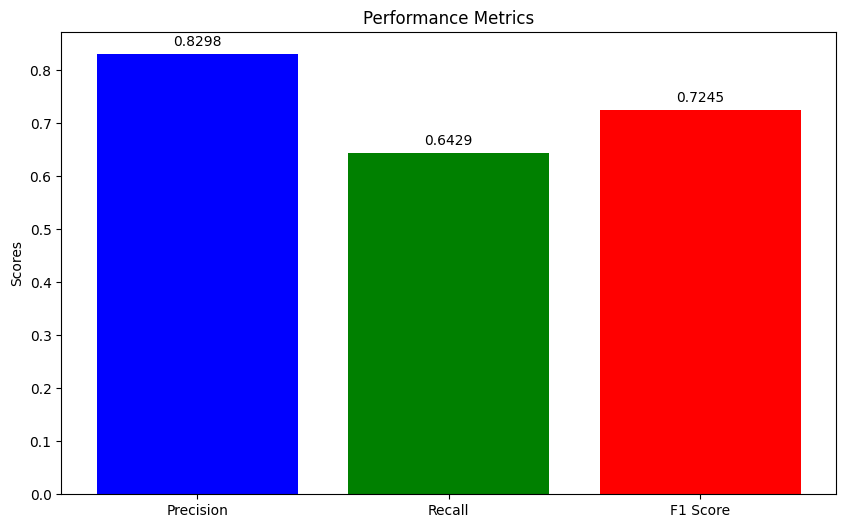

In [7]:
### Metric graph for visualization ###

# Labels for the metrics
metrics = ['Precision', 'Recall', 'F1 Score']

# Values corresponding to each metric
values = [Precision, Recall, F1_Score]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])

# Adding the value labels on top of each bar
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f"{value:.4f}", ha = 'center', va = 'bottom')

# Setting the title and labels
plt.title('Performance Metrics')
plt.ylabel('Scores')
plt.show()